In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#modeli stabla odlučivanja
%store -r y_pred_dt
%store -r y_pred_smote
%store -r y_pred_smote_pca
%store -r y_pred_smote_lda

In [3]:
#model nasumičnih stabala
%store -r y_pred_rf

In [4]:
#model naivnog Bajesa radi upoređivanja
%store -r y_pred_nb

In [5]:
#modeli knn
%store -r y_pred_knn
%store -r y_pred_knn_smote
%store -r y_pred_knn_smote_pca
%store -r y_pred_knn_smote_lda

In [166]:
data = [
#stabla odlučivanja
{'Algoritam':'Stabla odlučivanja bez resamplovanja',
'Accuracy': 0.7862,
'Precision': 0.78445,
'Recall': 0.7862,
'F1 Score': 0.78529,
'Cohen Kappa Score': 0.63651},
{'Algoritam':'Stabla odlučivanja sa SMOTE',
'Accuracy': 0.78797,
'Precision': 0.79342,
'Recall': 0.78797,
'F1 Score': 0.79049,
'Cohen Kappa Score': 0.64614},
{'Algoritam':'Stabla odlučivanja sa SMOTE i PCA',
'Accuracy': 0.75028,
'Precision': 0.76428,
'Recall': 0.75028,
'F1 Score': 0.75629,
'Cohen Kappa Score': 0.59028},
{'Algoritam':'Stabla odlučivanja sa SMOTE i LDA',
'Accuracy': 0.6048,
'Precision': 0.67401,
'Recall': 0.6048,
'F1 Score': 0.62959,
'Cohen Kappa Score': 0.39801},
#nasumična stabla
{'Algoritam':'Nasumična šuma bez resamplovanja',
'Accuracy': 0.8168,
'Precision': 0.80622,
'Recall': 0.8168,
'F1 Score': 0.80852,
'Cohen Kappa Score': 0.67437},
#knn
{'Algoritam':'KNN bez resamplovanja',
'Accuracy': 0.80799,
'Precision': 0.80768,
'Recall': 0.80799,
'F1 Score': 0.80783,
'Cohen Kappa Score': 0.67487},
{'Algoritam':'KNN sa SMOTE',
'Accuracy': 0.80711,
'Precision': 0.812,
'Recall': 0.80711,
'F1 Score': 0.80936,
'Cohen Kappa Score': 0.64146},
{'Algoritam':'KNN sa SMOTE i PCA',
'Accuracy': 0.7844,
'Precision': 0.79139,
'Recall': 0.7844,
'F1 Score': 0.78757,
'Cohen Kappa Score': 0.641462},
{'Algoritam':'KNN sa SMOTE i LDA',
'Accuracy': 0.62091,
'Precision': 0.68387,
'Recall': 0.62091,
'F1 Score': 0.64358,
'Cohen Kappa Score': 0.41872},
#naivni Bajes
{'Algoritam':'Naivni Bajes bez resamplovanja',
'Accuracy': 0.58575,
'Precision': 0.44585,
'Recall': 0.58575,
'F1 Score': 0.47562,
'Cohen Kappa Score': 0.072751}]

performance_metrics = pd.DataFrame(data)
performance_metrics.sort_values(by=['Accuracy', 'Cohen Kappa Score'], ascending=False)

,Algoritam,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
4,Nasumična šuma bez resamplovanja,0.81680,0.80622,0.81680,0.80852,0.674370
5,KNN bez resamplovanja,0.80799,0.80768,0.80799,0.80783,0.674870
6,KNN sa SMOTE,0.80711,0.81200,0.80711,0.80936,0.641460
1,Stabla odlučivanja sa SMOTE,0.78797,0.79342,0.78797,0.79049,0.646140
0,Stabla odlučivanja bez resamplovanja,0.78620,0.78445,0.78620,0.78529,0.636510
7,KNN sa SMOTE i PCA,0.78440,0.79139,0.78440,0.78757,0.641462
2,Stabla odlučivanja sa SMOTE i PCA,0.75028,0.76428,0.75028,0.75629,0.590280
8,KNN sa SMOTE i LDA,0.62091,0.68387,0.62091,0.64358,0.418720
3,Stabla odlučivanja sa SMOTE i LDA,0.60480,0.67401,0.60480,0.62959,0.398010
9,Naivni Bajes bez resamplovanja,0.58575,0.44585,0.58575,0.47562,0.072751


In [167]:
k = range(0, 7)

models = ['0', 'A', 'B', 'C', 'D', 'E',
          'F', 'G', 'H',
          'I', 'J']
target_metrics = ['Vrsta algoritma', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Cohen Kappa Score']

accuracy = ['0', '0.81680', '0.80799', '0.80711', '0.78797', '0.78620', '0.78440', '0.75028', '0.62091', '0.60480', '0.58575']
precision = ['0','0.80622', '0.80768', '0.81200', '0.79342', '0.78445', '0.79139', '0.76428', '0.68387', '0.67401', '0.44585']
recall = ['0','0.81680', '0.80799', '0.80711', '0.78797', '0.78620', '0.78440', '0.75028', '0.62091', '0.60480', '0.58575']
f1_score = ['0','0.80852', '0.80783', '0.80936', '0.79049', '0.78529', '0.78757', '0.75629', '0.64358', '0.62959', '0.47562']
cohen_kappa_score = ['0','0.674370', '0.674870', '0.646140', '0.636510', '0.641462', '0.590280', '0.590280', '0.418720', '0.398010', '0.072751']

metrics = [accuracy, precision, recall, f1_score, cohen_kappa_score, accuracy]

colors = ['white', 'orange', 'red', 'red', 'green', 'green', 'red', 'green', 'red', 'green', 'blue']

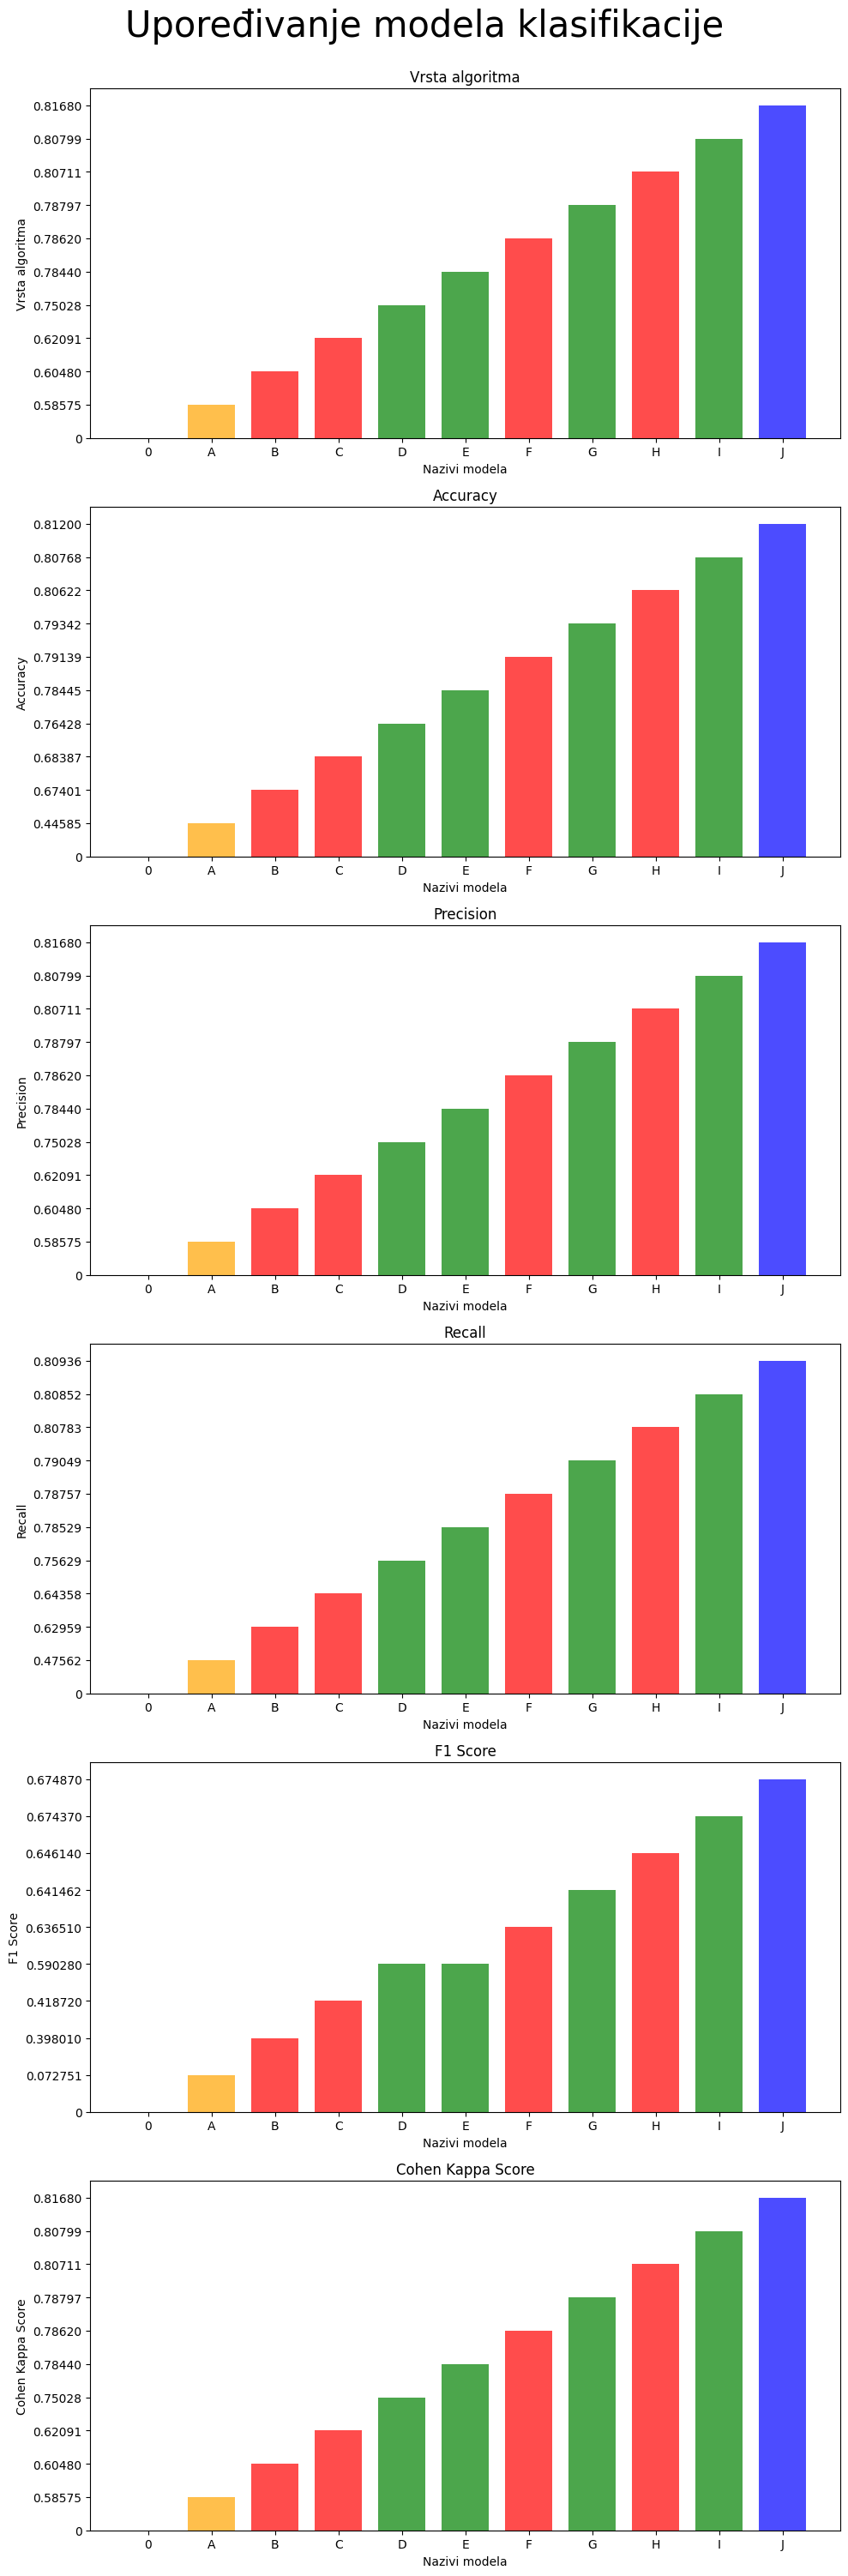

In [168]:
fig, axs = plt.subplots(6, 1, figsize=(10, 30))
fig.suptitle("Upoređivanje modela klasifikacije", y = 1, fontsize = 30)
for i, ax in zip(k, axs.flatten()):
    ax.set_title(f"{target_metrics[i]}")
    ax.set_xlabel("Nazivi modela")
    ax.set_ylabel(f"{target_metrics[i]}")
    
    ax.bar(sorted(models), sorted(metrics[i]), color = colors, width = 0.75, alpha = 0.7)
plt.tight_layout()
plt.show()

In [169]:
print('Model nasumične šume: plava')
print('J = Nasumična šuma bez resamplovanja\n')

print('Model stabla odlučivanja: crvena')
print('F = Stabla odlučivanja bez resamplovanja')
print('G = Stabla odlučivanja sa SMOTE')
print('D = Stabla odlučivanja sa SMOTE i PCA')
print('B = Stabla odlučivanja sa SMOTE i LDA\n')

print('Model k najbližih suseda: zelena')
print('I = KNN bez resamplovanja')
print('H = KNN sa SMOTE')
print('E = KNN sa SMOTE i PCA')
print('C = KNN sa SMOTE i LDA\n')

print('Model naivnog Bajesa: žuta')
print('A = Naivni Bajes bez resamplovanja')

Model nasumične šume: plava
J = Nasumična šuma bez resamplovanja

Model stabla odlučivanja: crvena
F = Stabla odlučivanja bez resamplovanja
G = Stabla odlučivanja sa SMOTE
D = Stabla odlučivanja sa SMOTE i PCA
B = Stabla odlučivanja sa SMOTE i LDA

Model k najbližih suseda: zelena
I = KNN bez resamplovanja
H = KNN sa SMOTE
E = KNN sa SMOTE i PCA
C = KNN sa SMOTE i LDA

Model naivnog Bajesa: žuta
A = Naivni Bajes bez resamplovanja
